<b> Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): <br>
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]<br>
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). <br>
Произвести расчет как с использованием intercept, так и без.

In [10]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [11]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # ks

In [12]:
# с использованием intercept
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [13]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

In [14]:
y_pred_1 = a + b*x

In [15]:
# без использования intercept
b = np.mean(x * y)/np.mean(x**2)
b

5.889820420132688

In [16]:
y_pred_2 = b*x

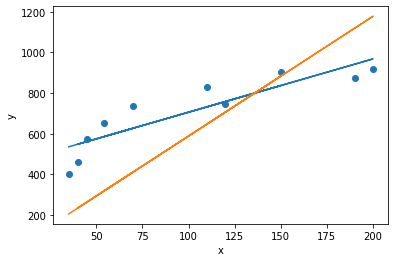

In [17]:
plt.scatter(x, y)
plt.plot(x, y_pred_1)
plt.plot(x, y_pred_2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<b> Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [104]:
def mse(B1, y=y, x=x):
    n = len(x)
    return np.sum((B1*x-y)**2)/n

In [111]:
B1 = 5.7
n = len(x)
alpha = 0.00001

In [113]:
for i in range(51):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%5==0:
        print(i, B1, mse(B1))

0 5.889820406350363 56516.85841571941
5 5.889820417382145 56516.85841571941
10 5.889820419583762 56516.8584157194
15 5.88982042002314 56516.8584157194
20 5.889820420110826 56516.85841571941
25 5.889820420128325 56516.85841571941
30 5.8898204201318185 56516.85841571943
35 5.889820420132515 56516.85841571939
40 5.889820420132654 56516.8584157194
45 5.889820420132682 56516.8584157194
50 5.889820420132688 56516.8584157194


<b>В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?<b>

таблица критических точек распределения Стьюдента используется когда известно число степеней свободы и уровень значимости α. <br> таблица значений функции Лапласа используется когда известна дисперсия генеральной совокупности

<b>Произвести вычисления как в пункте 2, но с вычислением intercept.  <br>
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [181]:
def mse(B1, A1, y=y, x=x):
    n = len(x)
    return np.sum((B1*x+A1-y)**2)/n

In [182]:
B1 = 2.5
A1 = 400
n = len(x)
alpha = 0.00005

for i in range(350001):
    A0,B0 = A1,B1
    B1 -= alpha*(2/n)*np.sum((B0*x+A0-y)*x)
    A1 -= alpha*(2/n)*np.sum((B0*x+A0-y))
    if i%50000==0:
        print(i, B1, A1, mse(B1,A1))

0 3.11402 400.00564 7355.866395380083
50000 2.7120042890699994 431.75073877224384 6509.585351898086
100000 2.646269687194868 440.68153406350973 6473.514184308142
150000 2.627777403930988 443.19392162784806 6470.659532121461
200000 2.622575204015634 443.9006998113764 6470.433616531494
250000 2.621111734979729 444.09952876906306 6470.415737697063
300000 2.620700035765217 444.15546280230427 6470.4143227760305
350000 2.6205842176378353 444.1711980156798 6470.414210799968
